# Computação do trabalho médio e do trabalho máximo de um motor de Szilard de uma ou mais partículas com a possibilidade de erro na medida da posição das partículas



  Para um motor de Szilard de uma partícula confinada em um volume de comprimento unitário onde a partição é inserida na posição $x,0\leq x \leq 1$ e a posição é medida com uma taxa de acerto de $(1-e), 0\leq e \leq 1$ temos que o trabalho realizado pela partícula sobre a partição, proporcional a escala de energia do reservatório térmico que o motor está em contato, é dado por 
  
  $$
  \beta W = ln\left(\frac{x_f}{x_i}\right)  
  $$
onde $x_f$ e $x_i$ são as posições final e inicial da partição.

  Após a medição da posição da partícula o sistema é preparado para fornecer trabalho acoplando à partição um motor por exemplo que fornece energia conforme a partição se expande. Caso aconteça um erro na medição da posição da partícula, o sistema consumirá energia ao invés de fornecer. Assim, podemos delimitar posições finais $v_1$ e $v_0$ para a expansão da partição e através de simulações considerando posições aleatórios  iniciais da partícula podemos computar o trabalho realizado pelo motor.


  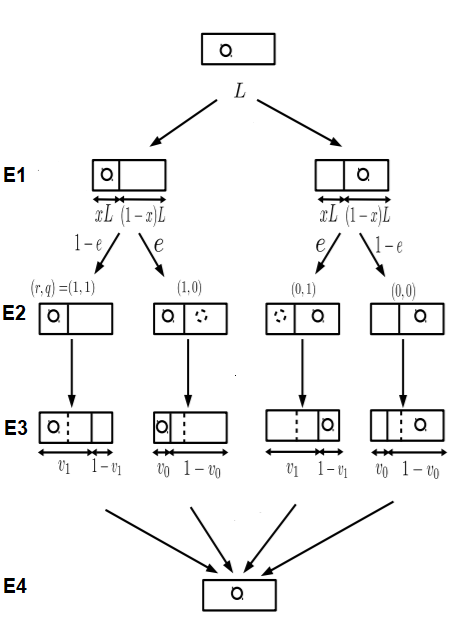
  
  Figura 1 - esquema de evolução dos possíveis estados para um ciclo do motor de Szilard, com a possibilidade de erro na medida da posição da partícula a uma taxa $e$. A variável $r$ representa a posição real da partícula e a variável $q$ representa a posição medida, sendo 1 o estado que indica a partícula estando à esquerda da partição e o estado 0 à direita.

# Motor de Szilard de uma partícula sem erro na medição da posição

Vamos começar simulando o trabalho médio $<W>$ para um motor de Szilard de uma partícula sem erro na medição da posição da partícula:

Text(0.5, 1.0, '<W> Motor de Szilard: 1 partícula sem erro na medição')

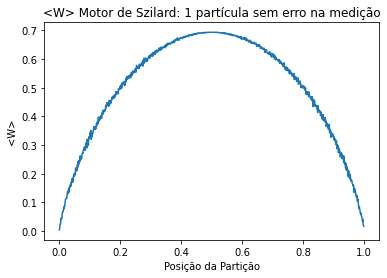

In [2]:
import numpy as np
import time 
import math
import matplotlib.pyplot as plt
import itertools
from random import randint
from IPython.display import clear_output
import os

########################################################################################
##                                   VARIÁVEIS
########################################################################################
N=10000                      #número de iterações por posição x
dv=1000                         #número de divisões do comprimento do volume do motor
T = 298.15                    #temperatura [K] do experimento
kb = 1.380649*10**-23         #constante de Boltzmann [J/K]
X=[]
Y=[]

#######################################################################################
##                                    FUNÇÕES
#######################################################################################

def Calc_Trabalho(xi,v_1,v_0,r_,q_):
#Calcula o trabalho de expansão realizado pela partição.
#Se r_ dif q_ o trabalho é realizado pelo sistema, caso contrário é realizado sobre o sistema

    #beta =  kb * T
    
    if(r_==1 and q_==1):
        trabalho = math.log(v_1/xi)
    
    #elif(r_==1 and q_==0):
    #    trabalho = +math.log(v_0/xi)    
    
    #elif(r_==0 and q_==1):
    #    trabalho = +math.log((1-v_1)/(1-xi))    
    
    elif(r_==0 and q_==0):
        trabalho = math.log((1-v_0)/(1-xi))
        
    return trabalho



#####################################################################################
##                                  Loop Principal
#####################################################################################

#Loop da varredura da posição x da partição divido em dv etapas
for i in range(1,dv):
    
    x = i/dv   
    v1 = 1           
    v0 = 0
    e = 0
    sum_trab = 0
    
    #Loop das N medidas e expansões
    for j in range(1,N):
        
        xp = randint(0,1000)
        if(xp < x*1000):
            r = 1
        else:
            r = 0
        
        #q = randint(0,1)
   
        sum_trab = sum_trab + Calc_Trabalho(x,v1,v0,r,r)
        
    X.append(x)
    Y.append(sum_trab/N)

#Print das medidas    
#print("PosInic  TrabMedio")

#for l in range(len(X)):
#    print(X[l], '\t ' , Y[l])
    
plt.plot(X, Y)
plt.xlabel('Posição da Partição')
plt.ylabel('<W>')
plt.title('<W> Motor de Szilard: 1 partícula sem erro na medição')


# Motor de Szilard de uma partícula com possibilidade de erro na medida da posição

Agora vamos considerar a possibilidade de erro na medição da posição da partícula há uma taxa $e$. Isso implica que a expansão seja feita até um certo limite $v1$ e $v0$, ao invés de até o volume total do motor, já que no caso de erro da medida da posição da partícula a partição demandaria um energia infinita para comprimir a partícula até um volume zero.

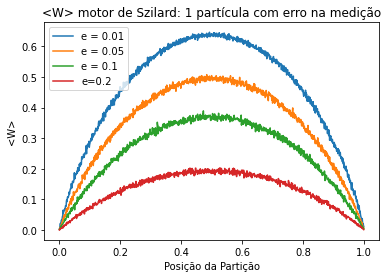

In [3]:
import numpy as np
import time 
import math
import matplotlib.pyplot as plt
import itertools
from random import randint
from IPython.display import clear_output
import os

########################################################################################
##                                   VARIÁVEIS
########################################################################################
N=10000                      #número de iterações por posição x
dv=1000                        #número de divisões do comprimento do volume do motor
T = 298.15                    #temperatura [K] do experimento
kb = 1.380649*10**-23         #constante de Boltzmann [J/K]
YY = []                       #Matriz que guarda os valores de trabalho/x para cada taxa de erro e

#######################################################################################
##                                    FUNÇÕES
#######################################################################################

def Calc_Trabalho(xi,v_1,v_0,r_,q_):
#Calcula o trabalho de expansão realizado pela partição.
#Se r_ dif q_ o trabalho é realizado pelo sistema, caso contrário é realizado sobre o sistema

    #beta =  kb * T
    
    if(r_==1 and q_==1):
        trabalho = math.log(v_1/xi)
    
    elif(r_==1 and q_==0):
        trabalho = math.log(v_0/xi)    
    
    elif(r_==0 and q_==1):
        trabalho = math.log((1-v_1)/(1-xi))    
    
    else:
        trabalho = math.log((1-v_0)/(1-xi))
        
    return trabalho



#####################################################################################
##                                  Loop Principal
#####################################################################################

E = [0.01,0.05,0.1,0.2]  #taxas de erros a serem simuladas

#Loop das diferentes taxas de erro e
for q in range(len(E)):
    e = E[q]        
    X=[]
    Y=[]
    V1=[]
    V0=[]
    
    #Loop da varredura da posição x da partição divido em dv etapas
    for i in range(1,dv):
        
        x = i/dv
        v1 = (x*(1-e))/((1-e)*x+(1-x)*e)
        v0 = 1-((1-x)*(1-e))/((1-x)*(1-e)+x*e)
        sum_trab = 0

        #Loop das N medidas e expansões
        for j in range(1,N):

            x_ = randint(0,1000)
            e_ = randint(0,1000)

            if(x_ < x*1000 and e_ >= e*1000):    #r=1, q=1
                r = 1
                q = 1
            elif(x_ < x*1000 and e_ < e*1000):   #r=1, q=0
                r = 1
                q = 0
            elif(x_ >= x*1000 and e_ < e*1000):  #r=0, q=1
                r = 0
                q = 1
            else:                              #r=0, q=0
                r = 0
                q = 0

            sum_trab = sum_trab + Calc_Trabalho(x,v1,v0,r,q)

        X.append(x)
        Y.append(sum_trab/N)
        V1.append(v1)
        V0.append(v0)
        
    YY.append(Y)


plt.plot(X, YY[0])
plt.plot(X, YY[1])
plt.plot(X, YY[2])
plt.plot(X, YY[3])
plt.xlabel('Posição da Partição')
plt.ylabel('<W>')
plt.legend(['e = 0.01','e = 0.05','e = 0.1','e=0.2'])
plt.title('<W> motor de Szilard: 1 partícula com erro na medição')
plt.show()

# Motor de Szilard de Multi-partículas sem erro na medição

Agora vamos considerar o caso onde teremos $N$ partículas dentro do motor. Dessa forma, após a insersão da partição dividindo as partículas em dois grupos, um de $m$ partículas a direita da partição e outro de $N-m$ partículas a direita da partição, o sistema irá expandir até uma posição final $l_{eq}^m$. 

Considerando a substância do motor como sendo um gás ideal, temos que a posição de equilibrio se dá quando os dois lados exercem a mesma pressão sobre a partição, ou seja

$$
    \frac{mk_bT}{l_{eq}^m}=\frac{(N-m)k_bT}{1-l_{eq}^m} 
    \longrightarrow \frac{N-m}{m}+1=\frac{1}{l_{eq}^m}
    \longrightarrow l_{eq}^m=\frac{1}{\frac{N-m}{m}+1} = \frac{m}{N}
$$

Utilizando sorteios aletaórios para as posições das partículas podemos simular o trabalho do ciclo de Szilar para várias partículas com a partição sendo inserida em diferentes posições.

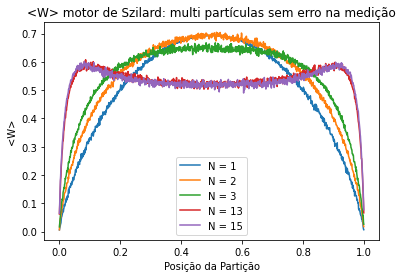

In [20]:
import numpy as np
import time 
import math
import matplotlib.pyplot as plt
import itertools
from random import randint
from IPython.display import clear_output
import os

########################################################################################
##                                   VARIÁVEIS
########################################################################################
V=10000                      #número de iterações por posição x
dv=1000                        #número de divisões do comprimento do volume do motor
T = 298.15                    #temperatura [K] do experimento
kb = 1.380649*10**-23         #constante de Boltzmann [J/K]
YY = []                       #Matriz que guarda os valores de trabalho/x para cada número total de partículas N
N_ = []
#######################################################################################
##                                    FUNÇÕES
#######################################################################################

def Calc_Trabalho(xi,m_,n):
#Calcula o trabalho de expansão realizado pela partição

    #beta =  kb * T

    xeq = m_/n
    
    if( xeq == xi ):
        trabalho = 0
        
    elif( m_ != 0 and m_ != n):
        trabalho = m_*math.log( xeq/xi ) + (n-m_)*math.log( (1-xeq)/(1-xi) )
        
    else:
        if(xeq > xi):
            trabalho = n*math.log( xeq/xi )
            
        else:
            trabalho = n*math.log( (1-xeq)/(1-xi) )


#    elif(xeq > xi):
        
#        trabalho = m_*math.log( xeq/xi ) + (n-m_)*math.log( (1-xeq)/(1-xi) )

#    else:
#        trabalho = math.log( (1-xeq)/(1-xi) )

        
#    if( 2*m_>n ):
#        trabalho = (2*m_-n)*trabalho
        
#    elif( 2*m_<n ):
#        trabalho = -(2*m_-n)*trabalho
    return trabalho



#####################################################################################
##                                  Loop Principal
#####################################################################################

N_ = [1, 2, 3, 13, 15]  #número de partículas no motor

#Loop para os diferentes números de partículas
for q in range(len(N_)):
    N = N_[q]
    X=[]
    Y=[]
    
    #Loop da varredura da posição x da partição divido em dv etapas
    for i in range(1,dv):
        
        x = i/dv
        sum_trab = 0
        
        #Loop das V medidas e expansões
        for j in range(1,V):
            
            m = 0

            #Loop de sorteio das posições das N partículas 
            for k in range(N):

                x_ = randint(0,10000)
                if(x_<x*10000):
                    m = m+1
                
            aux_xeq = m/N
            aux_w = Calc_Trabalho(x,m,N)
            sum_trab = sum_trab + aux_w
            #print(x,', ',aux_xeq,', ',m,', ',Calc_Trabalho(x,m,N))
            
        X.append(x)
        Y.append(sum_trab/V)

        
    YY.append(Y)


plt.plot(X, YY[0])
plt.plot(X, YY[1])
plt.plot(X, YY[2])
plt.plot(X, YY[3])
plt.plot(X, YY[4])
plt.xlabel('Posição da Partição')
plt.ylabel('<W>')
plt.legend(['N = 1','N = 2','N = 3','N = 13','N = 15'])
plt.title('<W> motor de Szilard: multi partículas sem erro na medição')
##plt.show()

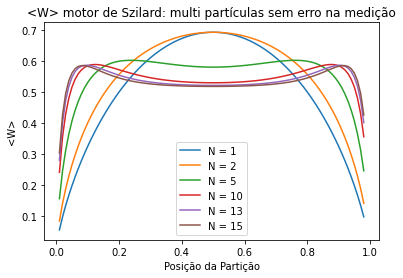

In [1]:
#########################################
##  Plot da equação 14 do artigo do Pal 
#########################################

import numpy as np
import time 
import math
import matplotlib.pyplot as plt
import itertools
from random import randint
from IPython.display import clear_output
import os
import scipy.special



#################################
##          VARIÁVEIS
#################################
N = [1,2,5,10,13,15]
YY=[]


################################
##           FUNÇÕES
################################
def Trab(m_,x_,N_):
    
    res = 0.
    res = scipy.special.binom(N_, m_)
    res = res * (x_**(m_))
    res = res * ((1-x_)**(N_-m_))
    
    if(m_ == 0):
        res = -res * np.log( ( (1-x_)/(1-m_/N_) )**(N_-m_) ) 
    elif(m_ == N_):
        res = -res * np.log( ( ( (x_*N_)/m_ )**m_ ) )
    else:
        res = -res * ( np.log( ( ( (x_*N_)/m_ )**m_ ) ) + np.log( ( (1-x_)/(1-m_/N_) )**(N_-m_) ) )
    
    return res

x = np.arange( 0.01, 0.99, 0.01 )

#################################
##      LOOP Nº PARTÍCULAS
#################################
for u in range(len(N)):
    m = np.arange( 0, N[u]+1, 1  )
    
    X=[]
    Y=[]
    ############################
    ## LOOP DA POSIÇÃO PARTIÇÃO
    ############################
    for s in range(len(x)):
        aux = 0.

        ########################
        ## LOOP DA SOMATÓRIA
        ########################
        for l in range(len(m)):
            aux += Trab(m[l],x[s],N[u]) 

        Y.append(aux)
    
    YY.append(Y)


plt.plot(x, YY[0])
plt.plot(x, YY[1])
plt.plot(x, YY[2])
plt.plot(x, YY[3])
plt.plot(x, YY[4])
plt.plot(x, YY[5])


plt.xlabel('Posição da Partição')
plt.ylabel('<W>')
plt.legend(['N = 1','N = 2','N = 5','N = 10','N = 13','N = 15'])
plt.title('<W> motor de Szilard: multi partículas sem erro na medição')
plt.show()
